# Lab 01: Urbana Weather

---
author: Henry Guo
date: Feb 6, 2024
embed-resources: true
---

# Introduction: 
The goal of this lab is to create a regression model that predicts the minimum daily temperature in Urbana, IL for a particular day of the year using data from 2016 to 2022. 

## Methods

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from joblib import dump

## Data

In [19]:
weather_train = pd.read_csv(
    "https://cs307.org/lab-01/data/weather-train.csv",
    index_col="date",
    parse_dates=True
)
weather_vtrain = pd.read_csv(
    "https://cs307.org/lab-01/data/weather-vtrain.csv",
    index_col="date",
    parse_dates=True
) # try different models on different validtion data, find best models, then use that model on the validation-train data
weather_validation = pd.read_csv(
    "https://cs307.org/lab-01/data/weather-validation.csv",
    index_col="date",
    parse_dates=True
)

# Visualization

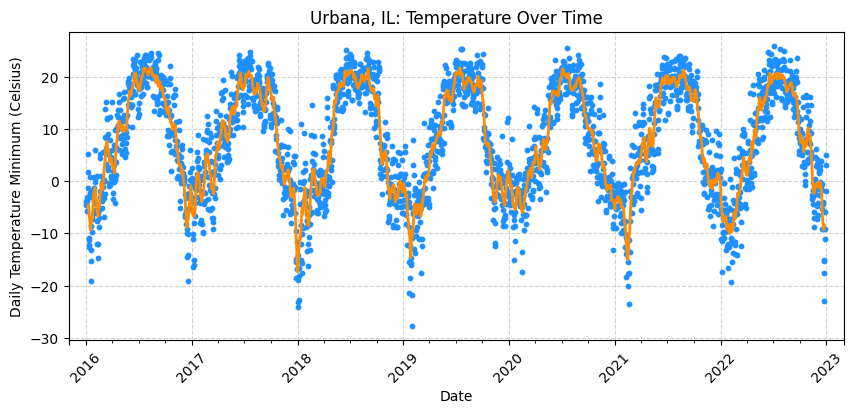

In [20]:
# Create a figure and axis object with a wider width than height
# assisted by 307.org
fig, ax = plt.subplots(figsize=(10, 4))

# Scatter 'temperature_2m_min' on the y-axis with a specific point size
ax.scatter(weather_train.index, weather_train["temperature_2m_min"], s=10, c="dodgerblue")

# Calculate the rolling mean with a window of 7 days and plot it
weather_train["temperature_2m_min"].rolling(window=14, center=True).mean().plot(
    ax=ax, color="darkorange", linewidth=2
)

# Set the title and labels
ax.set_title("Urbana, IL: Temperature Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Daily Temperature Minimum (Celsius)")

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add buffer around the plot by adjusting the x-axis limits
buffer = pd.Timedelta(days=60)  # Adjust the buffer size as needed
ax.set_xlim([weather_train.index.min() - buffer, weather_train.index.max() + buffer])

# add grid
ax.grid(True, linestyle="--", color="lightgrey")
ax.set_axisbelow(True)  # put grid behind the points

# Show the plot
plt.show()

# Test Statistics

In [21]:
year_counts = weather_train['year'].value_counts()
month_counts = weather_train['month'].value_counts()
# Compute the mean and standard deviation of bill depth for each species
year_stat = weather_train.groupby('year')['temperature_2m_min'].agg(['mean', 'std'])
month_stat = weather_train.groupby('month')['temperature_2m_min'].agg(['mean', 'std'])
# Display the results
print("Total record Counts:\n", year_counts)
print("\nYearly Temp Stats (mean and std):\n", year_stat)
print("\nMonthly Temp Stats (mean and std):\n", month_stat)

Total record Counts:
 year
2016    366
2020    366
2017    365
2018    365
2019    365
2021    365
2022    365
Name: count, dtype: int64

Yearly Temp Stats (mean and std):
           mean        std
year                     
2016  8.793391  10.274506
2017  8.399644   9.692305
2018  7.591014  11.369452
2019  7.229781  10.882260
2020  7.684612   9.383593
2021  8.119370  10.388489
2022  7.010192  11.028170

Monthly Temp Stats (mean and std):
             mean       std
month                     
1      -5.416767  6.547430
2      -4.380614  6.746122
3       1.522173  5.595675
4       5.925214  5.659612
5      12.639454  5.234890
6      18.211405  3.540279
7      19.998210  2.627939
8      19.088071  2.874603
9      16.571643  3.988397
10      9.756274  5.775242
11      1.888310  5.663248
12     -2.514694  5.680539


## Model

In [22]:
# Process data for machine learning
# data from 2016-2022
X_train = weather_train[["year", "day_of_year"]]
y_train = weather_train["temperature_2m_min"]
#data from 2016-2020
X_vtrain = weather_vtrain[["year", "day_of_year"]]
y_vtrain = weather_vtrain["temperature_2m_min"]
# data from 2021-2022
X_validation = weather_validation[["year", "day_of_year"]]
y_validation = weather_validation["temperature_2m_min"]

In [23]:
# Train Model
knn_model = KNeighborsRegressor(n_neighbors=200)
knn_model.fit(X_vtrain, y_vtrain) # fit model on validation train data
y_predict_knn = knn_model.predict(X_validation) # predict our model on validation data
rmse_knn = np.sqrt(mean_squared_error(y_validation, y_predict_knn))
knn_model.fit(X_train, y_train) # fit model on train data

KNeighborsRegressor(n_neighbors=200)

## Results

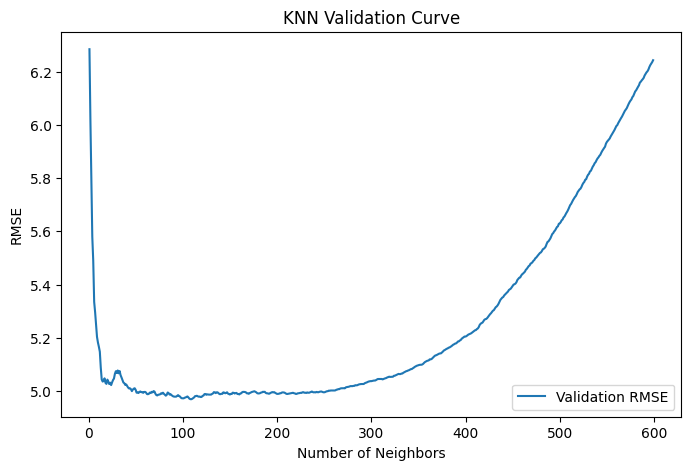

RMSE of KNN model tested on validation data: 4.9883877005605175


In [24]:
def plot_validation_curve(X_vtrain, y_vtrain, X_validation, y_validation): # plotting RMSE after KNN trained on validation-train data
    neighbor_range = range(1, 600)  # Neighbor range adjustments
    validation_rmse = []
    for n in neighbor_range:
        model = KNeighborsRegressor(n_neighbors=n)
        model.fit(X_vtrain, y_vtrain)
        y_validation_pred = model.predict(X_validation)
        rmse = np.sqrt(mean_squared_error(y_validation, y_validation_pred))
        validation_rmse.append(rmse)


    plt.figure(figsize=(8, 5))
    plt.plot(neighbor_range, validation_rmse, label='Validation RMSE')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('RMSE')
    plt.title('KNN Validation Curve')
    plt.legend()
    plt.show()
plot_validation_curve(X_vtrain, y_vtrain, X_validation, y_validation)
print("RMSE of KNN model tested on validation data:", rmse_knn)

In [25]:
# Saving Model
model_filename = 'urbana-weather.joblib'
dump(knn_model, model_filename)

['urbana-weather.joblib']

## Discussion


As an infimum was found on the KNN Validation curve at approximately k = 200, we minimize our root mean squared error to just below 5.
Our KNN regression model predicts general urbana weather fairy well. The model should consider global warming. Hence, using data more recently and with a longer timespan
can account for the global warming changes. 



## Conclusion

I will not use this model to predict general urbana weather. First, there are many extreme weather situations during winter, where 
the temperature on these days will be normalized to the model which doesn't account for extreme data points. Second, the data is measured
in the middle of the town, which is represented by mostly modern buildings, whereas the majority of Urbana is probably covered by corn. Thus the
temperature felt around most of Urbana cannot be represented accurately using the model.